In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import temperature

In [3]:
from collections import namedtuple
ResonatorData = namedtuple('ResonatorData', field_names=['f_data', 's21_data',
                                                         'f_model', 's21_model',
                                                         'f_r', 's21_r'])

def extract(resonator, normalize, num_model_points):
    f_data = resonator.frequency.copy()
    s21_data = resonator.data.copy()
    f_model = np.linspace(f_data.min(), f_data.max(), num_model_points)
    s21_model = resonator.model.eval(params=resonator.current_params, f=f_model)
    f_r = resonator.f_0
    s21_r = resonator.model.eval(params=resonator.current_params, f=f_r)
    if normalize:
        s21_data = resonator.remove_background(frequency=f_data, s21_raw=s21_data)
        s21_model = resonator.remove_background(frequency=f_model, s21_raw=s21_model)
        s21_r = resonator.remove_background(frequency=f_r, s21_raw=s21_r)
    return ResonatorData(f_data, s21_data, f_model, s21_model, f_r, s21_r)

    
def amplitude(axis, resonator, normalize=False, num_model_points=1000, f_scale=1e-6, three_ticks=True, 
              data_color='blue', model_color='brown'):
    rd = extract(resonator, normalize, num_model_points)
    ax.plot(f_scale * rd.f_data, 20 * np.log10(np.abs(rd.s21_data)), '.', color=data_color, markersize=2)
    ax.plot(f_scale * rd.f_model, 20 * np.log10(np.abs(rd.s21_model)), '-', color=model_color)
    ax.plot(f_scale * rd.f_r, 20 * np.log10(np.abs(rd.s21_r)), '.', color=model_color, markersize=3)
    if three_ticks:
        ax.set_xticks(f_scale * np.array([rd.f_data.min(), rd.f_r, rd.f_data.max()]))


In [4]:
npd = npy.NumpyDirectory('/data/detectors/2016-08-22_153758_sweep_stream_on_off/')

In [5]:
npd.node_names()

['SingleSweepStream0',
 'SingleSweep1',
 'SingleStream2',
 'ADCSnap3',
 'SingleSweepStream4',
 'SingleSweep5',
 'SingleStream6',
 'ADCSnap7',
 'SingleSweepStream8',
 'SingleSweep9',
 'SingleStream10',
 'ADCSnap11',
 'SingleSweepStream12',
 'SingleSweep13',
 'SingleStream14',
 'ADCSnap15',
 'SingleSweepStream16',
 'SingleSweep17',
 'SingleStream18',
 'ADCSnap19',
 'SingleSweepStream20',
 'SingleSweep21',
 'SingleStream22',
 'ADCSnap23',
 'SingleSweepStream24',
 'SingleSweep25',
 'SingleStream26',
 'ADCSnap27',
 'SingleSweepStream28',
 'SingleSweep29',
 'SingleStream30',
 'ADCSnap31',
 'SingleSweepStream32',
 'SingleSweep33',
 'SingleStream34',
 'ADCSnap35',
 'SingleSweepStream36',
 'SingleSweep37',
 'SingleStream38',
 'ADCSnap39',
 'SingleSweepStream40',
 'SingleSweep41',
 'SingleStream42',
 'ADCSnap43',
 'SingleSweepStream44',
 'SingleSweep45',
 'SingleStream46',
 'ADCSnap47',
 'SingleSweepStream48',
 'SingleSweep49',
 'SingleStream50',
 'ADCSnap51',
 'SingleSweepStream52',
 'SingleSwe

In [6]:
all_sss = [npd.read(name) for name in npd.node_names() if name.startswith('SingleSweepStream')]

In [7]:
all_snaps = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

In [8]:
[(snap.x.ptp(), snap.y.ptp()) for snap in all_snaps]

[(197.0, 241.0),
 (65.0, 81.0),
 (30.0, 37.0),
 (23.0, 27.0),
 (164.0, 217.0),
 (59.0, 78.0),
 (29.0, 41.0),
 (21.0, 30.0),
 (177.0, 199.0),
 (62.0, 75.0),
 (30.0, 40.0),
 (22.0, 28.0),
 (132.0, 143.0),
 (49.0, 53.0),
 (27.0, 25.0),
 (18.0, 20.0),
 (107.0, 110.0),
 (42.0, 45.0),
 (27.0, 25.0),
 (19.0, 18.0),
 (117.0, 114.0),
 (44.0, 42.0),
 (22.0, 22.0),
 (18.0, 17.0),
 (104.0, 114.0),
 (39.0, 43.0),
 (20.0, 22.0),
 (15.0, 17.0),
 (22.0, 20.0),
 (11.0, 11.0),
 (8.0, 10.0),
 (9.0, 10.0)]

In [9]:
for sss in all_sss:
    temperature.add_temperature(sss, cryostat='hpd')

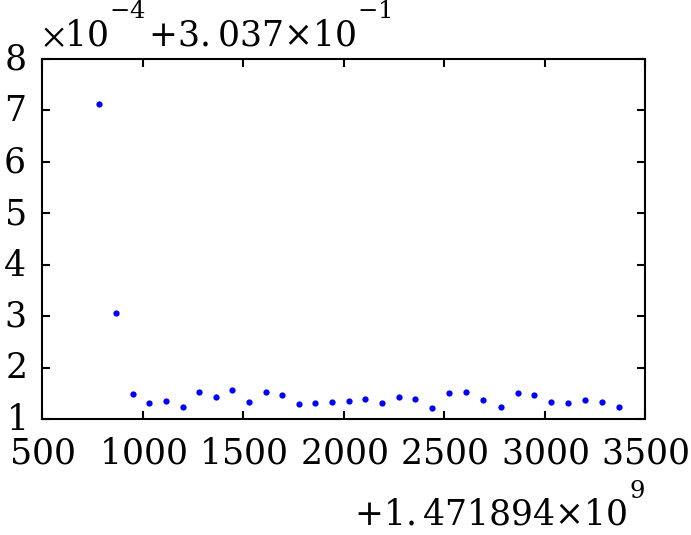

In [10]:
fig, ax = plt.subplots()
ax.plot([sss.stream.epoch for sss in all_sss],
        [sss.state.temperature.primary_package for sss in all_sss],
        '.b')

In [11]:
num_channels = 8
sss_dict = {}
for channel in range(num_channels):
    sss_dict[channel] = [sss for sss in all_sss if sss.state.lo_index == channel]

In [12]:
sss_dict

{0: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f8784e57450>,
 1: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f87778b43d0>,
 2: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f87776e9510>,
 3: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f877751a650>,
 4: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f877734c790>,
 5: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f87769e38d0>,
 6: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f8776804a10>,
 7: [<kid_readout.measurement.basic.SingleSweepStream at 0x7f87766a4a90>,
  <kid_readout.measurement.basic.SingleSweepStream at 0x7f87765596d0>]}

Qi: 9357; Qe: 21438 +4108j
Qi: 16049; Qe: 21807 +2379j
Qi: 16326; Qe: 21792 +2663j
Qi: 16258; Qe: 21821 +2741j


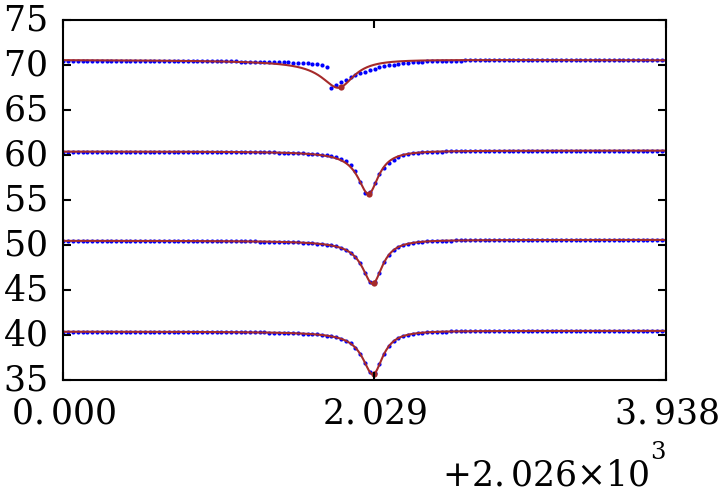

In [32]:
channel = 0
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qe: {:.0f} {:+.0f}j".format(sss.resonator.Q_i, sss.resonator.Q_e_real, sss.resonator.Q_e_imag))

Qi: 10963; Qe: 20214 -2352j
Qi: 12849; Qe: 20406 -1598j
Qi: 12889; Qe: 20471 -1478j
Qi: 12864; Qe: 20576 -1468j


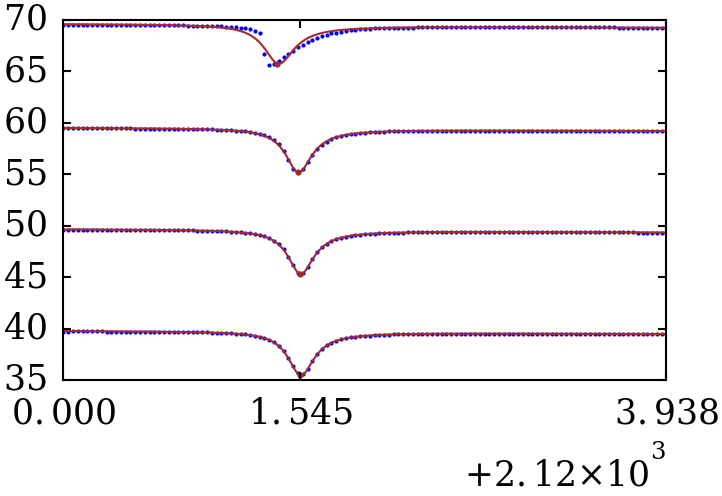

In [33]:
channel = 1
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qe: {:.0f} {:+.0f}j".format(sss.resonator.Q_i, sss.resonator.Q_e_real, sss.resonator.Q_e_imag))

Qi: 12135; Qe: 25358 -6717j
Qi: 11097; Qe: 21872 -6685j
Qi: 14368; Qe: 24522 -5355j
Qi: 14302; Qe: 24580 -5366j


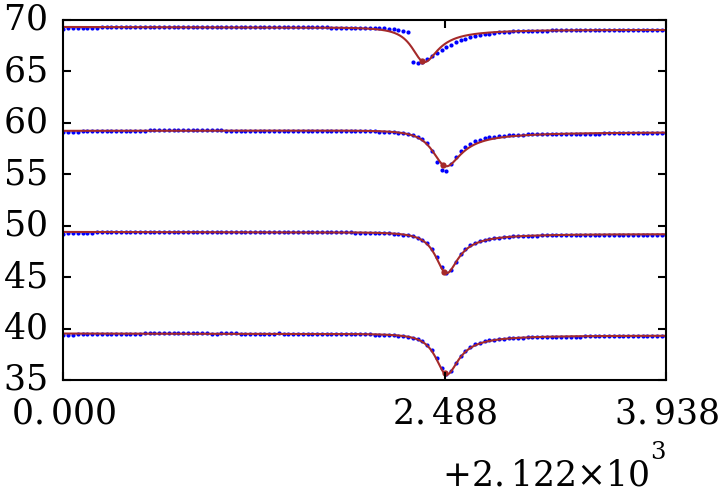

In [34]:
channel = 2
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qe: {:.0f} {:+.0f}j".format(sss.resonator.Q_i, sss.resonator.Q_e_real, sss.resonator.Q_e_imag))

Qi: 3890; Qe: 3511 +2979j
Qi: 3879; Qe: 3510 +2972j
Qi: 3867; Qe: 3508 +2980j
Qi: 3845; Qe: 3505 +2984j


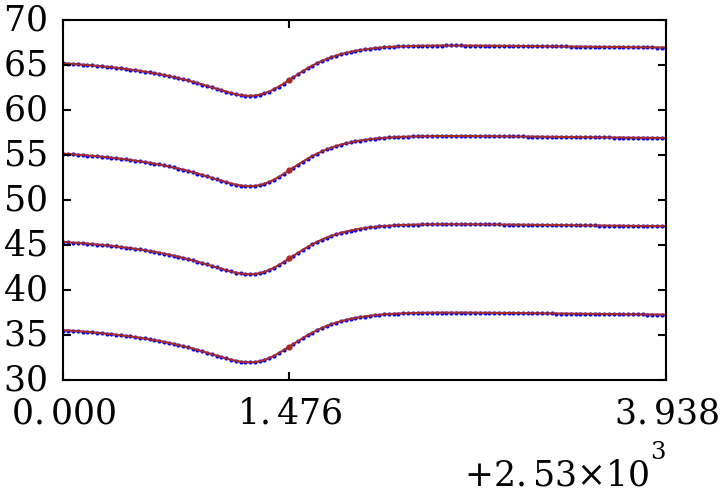

In [35]:
channel = 3
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qe: {:.0f} {:+.0f}j".format(sss.resonator.Q_i, sss.resonator.Q_e_real, sss.resonator.Q_e_imag))

Qi: 2084; Qe: 738 +1589j
Qi: 1878; Qe: 514 +1468j
Qi: 1859; Qe: 497 +1458j
Qi: 1849; Qe: 488 +1474j


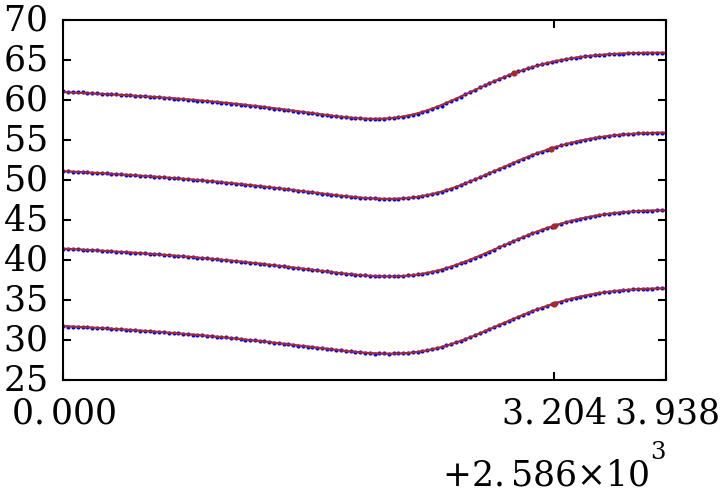

In [36]:
channel = 4
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qe: {:.0f} {:+.0f}j".format(sss.resonator.Q_i, sss.resonator.Q_e_real, sss.resonator.Q_e_imag))

Qi: 3650; Qe: 5824 -4034j
Qi: 3788; Qe: 6154 -3983j
Qi: 3774; Qe: 6188 -3919j
Qi: 3744; Qe: 6237 -3886j


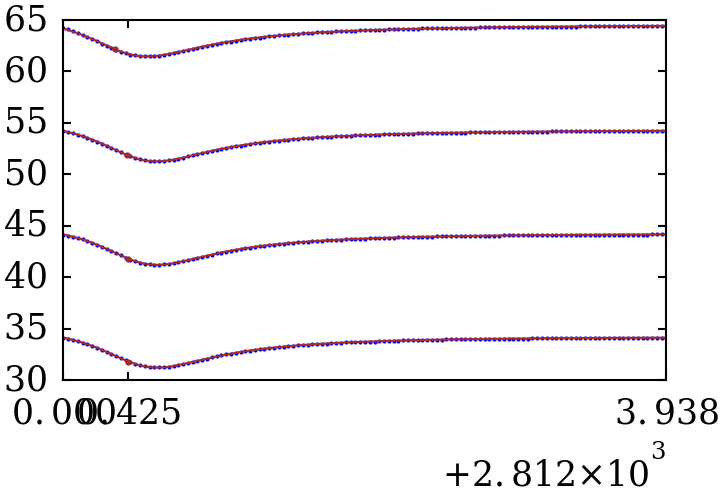

In [37]:
channel = 5
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qe: {:.0f} {:+.0f}j".format(sss.resonator.Q_i, sss.resonator.Q_e_real, sss.resonator.Q_e_imag))

Qi: 3895; Qe: 5176 -6297j
Qi: 4014; Qe: 5596 -6207j
Qi: 4017; Qe: 5670 -6189j
Qi: 4019; Qe: 5780 -6229j


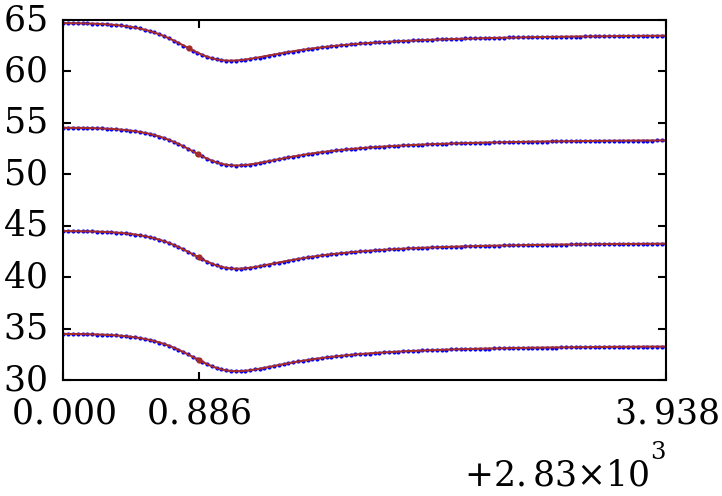

In [38]:
channel = 6
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qe: {:.0f} {:+.0f}j".format(sss.resonator.Q_i, sss.resonator.Q_e_real, sss.resonator.Q_e_imag))

Qi: 18132; Qe: 37759 -10019j
Qi: 17988; Qe: 37637 -9927j
Qi: 17663; Qe: 37767 -9858j
Qi: 17818; Qe: 38210 -9218j


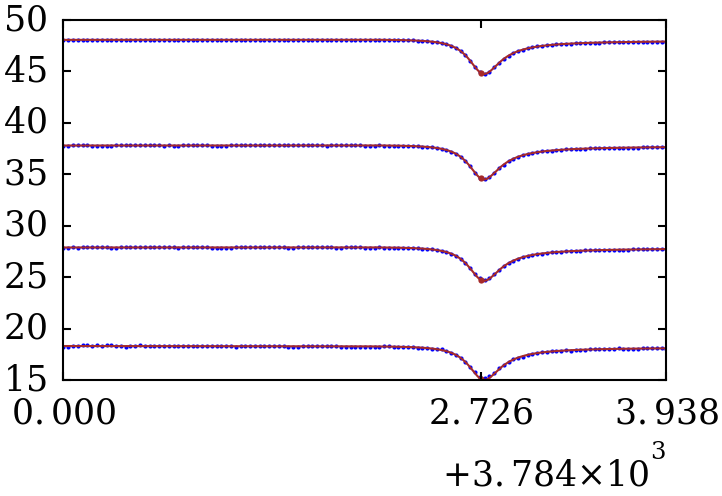

In [39]:
channel = 7
fig, ax = plt.subplots()
for sss in sss_dict[channel]:
    amplitude(ax, sss.resonator)
    print("Qi: {:.0f}; Qe: {:.0f} {:+.0f}j".format(sss.resonator.Q_i, sss.resonator.Q_e_real, sss.resonator.Q_e_imag))

In [21]:
f_scale = 1e-9
Qi_color = 'blue'
Qc_color = 'green'

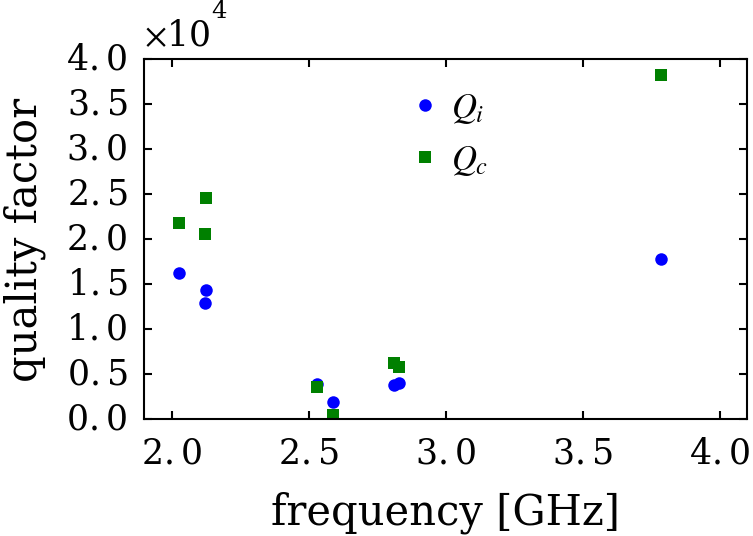

In [22]:
attenuation_index = 3
fig, ax = plt.subplots()
sssl = [sss_list[attenuation_index] for sss_list in sss_dict.values()]
ax.plot([f_scale * sss.resonator.f_0 for sss in sssl],
        [sss.resonator.Q_i for sss in sssl],
        'o', color=Qi_color, label='$Q_i$')
ax.plot([f_scale * sss.resonator.f_0 for sss in sssl],
        [sss.resonator.Q_e_real for sss in sssl],
        's', color=Qc_color, label='$Q_c$')

ax.set_xlabel('frequency [GHz]')
ax.set_ylabel('quality factor')
ax.legend(loc='upper center', numpoints=1)
ax.set_xlim(1.9, 4.1);

#fig.savefig('/home/flanigan/temp/2016-08-11_TwoLayer02-0304_Qi_and_Qc_vs_fr.pdf')

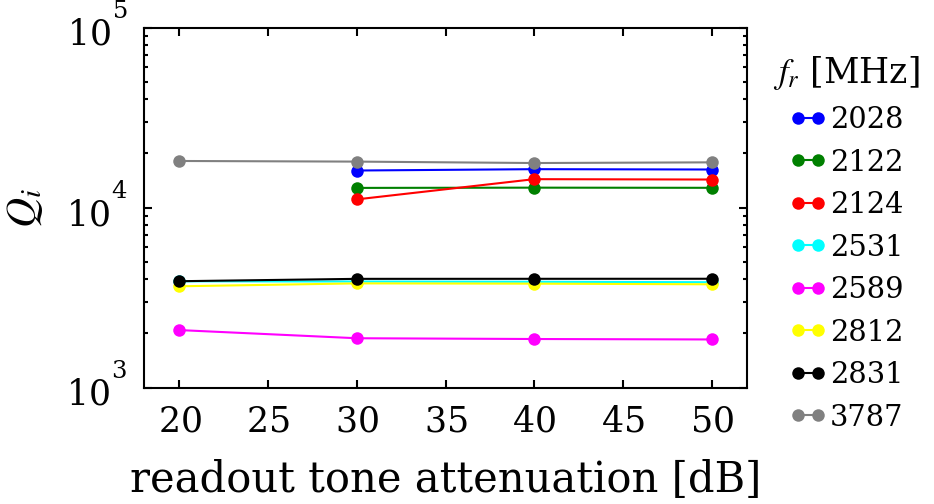

In [23]:
first_good_attenuations = 3 * [1] + 5 * [0]
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'gray']

fig, ax = plt.subplots()
ax.set_yscale('log')
ax.set_ylabel('$Q_i$')
ax.set_xlabel('readout tone attenuation [dB]')

for channel in range(num_channels):
    sssl = sss_dict[channel][first_good_attenuations[channel]:]
    ax.plot([sss.stream.roach_state.dac_attenuation for sss in sssl],
             [sss.resonator.Q_i for sss in sssl],
            '-', marker='o', color=colors[channel], label='{:.0f}'.format(1e-6 * sssl[-1].resonator.f_0))

legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='xx-small', title=r'$f_r$ [MHz]');
legend.get_title().set_fontsize('x-small')
ax.set_xlim(18, 52);

#fig.savefig('/home/flanigan/temp/2016-08-11_TwoLayer02-0304_Qi_vs_atten.pdf', bbox_inches='tight')

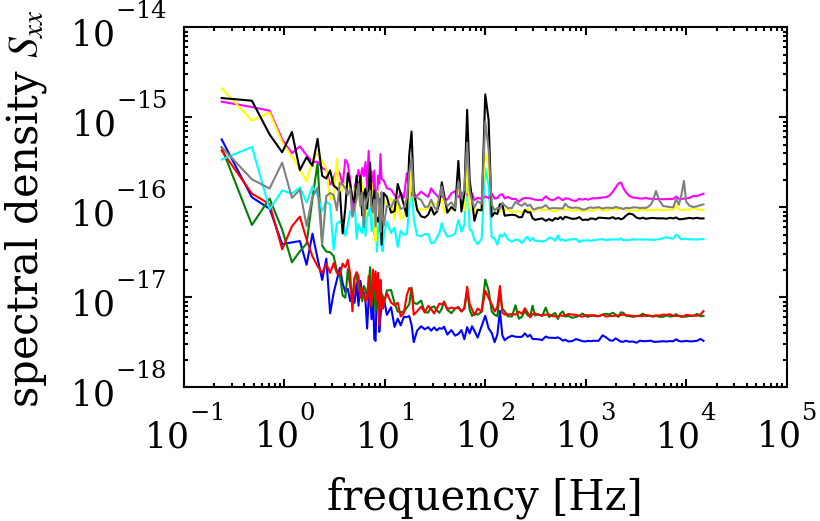

In [24]:
attenuation_index = 1

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('spectral density $S_{xx}$')

for channel, sssl in sss_dict.items():
    sss = sssl[attenuation_index]
    sss.set_S(binned=True)
    ax.plot(sss.S_frequency, sss.S_xx, color=colors[channel])

#fig.savefig('/home/flanigan/temp/2016-08-11_TwoLayer02-0304_all_Sxx_vs_frequency_at_30dB.pdf', bbox_inches='tight')

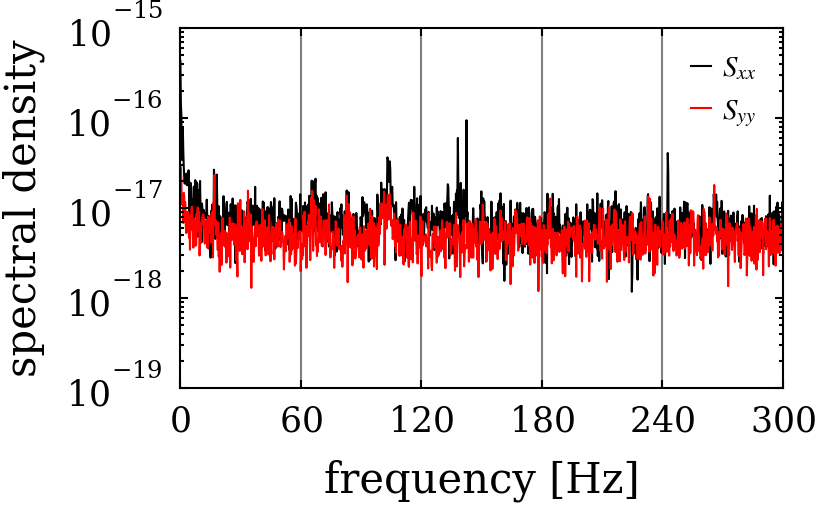

In [25]:
attenuation_index = 1
channel = 2
sss = sss_dict[channel][attenuation_index]
sss.set_S(binned=False)
fig, ax = plt.subplots()
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('spectral density')
ax.set_yscale('log')
ax.set_xticks([0, 60, 120, 180, 240, 300])

for f in [60, 120, 180, 240]:
    ax.axvline(f, color='gray')
ax.plot(sss.S_frequency, sss.S_xx, color='k', label='$S_{xx}$')
ax.plot(sss.S_frequency, sss.S_yy, color='r', label='$S_{yy}$')
ax.legend(loc='upper right', ncol=1, fontsize='xx-small')

ax.set_xlim(0, 300);
#fig.savefig('/home/flanigan/temp/2016-08-11_TwoLayer02-0304_channel_0_Sxx_Syy_vs_frequency.pdf', bbox_inches='tight')